# Classification Model for Iris Dataset 

*Saimat Balabekova* 
<img src="https://www.almanac.com/sites/default/files/image_nodes/iris-flowers.jpg" width="300" height="auto" style="border-radius:50%">




<div style="text-align: justify">In this Jupyter notebook I will attempt to implement the Random Forest Algorithm on The Iris Flower Dataset using a Scikit-learn package in Python. The Iris Flower dataset comes with the Scikit-Learn package itself, meaning that it is clean enough to be used for training an ML model. This is useful for the scope of this project as it will allows me to explore the Scikit-learn package and focus on the nature of Random Forest Algorithm without spending time on obtaining, cleaning and transforming data.

    
**Objective:** To build a model that allows us to predict the type of an Iris flower based on its Petal and Sepal features such as length and width.  </div> 

## Getting Started

In order to start I must begin with importing all the libraries needed:

In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
import pandas as pd

Having imported the libraries, I am going to load the Iris dataset. To do so I will use *Datasets* submodule in Scikit-Learn and within it use *load_iris* fucntion:



In [2]:
iris = datasets.load_iris()

## Iris Dataset Genral Overview

Below is the overview of the Iris Flower Dataset:

In [3]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [22]:
len(iris.data)# samples of the Iris flower

150

In [5]:
print(iris.feature_names) # future input parameters

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [6]:
# target_names and target represent the same information but in different formats(i.e. in str and int respectively)
print(iris.target_names)
print (iris.target)

['setosa' 'versicolor' 'virginica']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [7]:
#creating a dataframe for visual scoping of the data

df=pd.DataFrame({
    'sepal length':iris.data[:,0],
    'sepal width':iris.data[:,1],
    'petal length':iris.data[:,2],
    'petal width':iris.data[:,3],
    'species':iris.target
})
df.head()

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0



Upon the first look we can see: 
1. the *"data"* array which composits of a 150 flowers
2. the *"target"* array that represents various class labels such as 0,1,2 
3. the *"target_names"* array which correspond to the class labels above such as 'setosa', 'versicolor', 'virginica'


Additionally, the dataset contains a list of "feature_names"  which represents the 4 characteristics of Iris Flower such as: "sepal Length"(cm),"sepal width"(cm); "petal length"(cm) and "petal width"(cm). 

Thus, **The Iris Dataset gives us 1 class output variable( i.e."target"/"target_names") and  4 input features (i.e. "feature_names").** This will inform the parameters used for out Classification Model. 

## *Input* and *Output* variables

For future use, let us assign **X** and **y** to be our *Input*(i.e."feature_names") and to the *Output*(i.e."target") variables:

In [8]:
X=df[['sepal length', 'sepal width', 'petal length', 'petal width']]  # input features
y=df['species']  # output


In [9]:
X.shape
#150 rows and 4 columns for features

(150, 4)

In [10]:
y.shape
#150 rows and only 1 column

(150,)

Thus **X** will contain 4 input features whereas the **y** will contain 1 feature. This makes up to a toal of 5 features over a 150 samples of Iris flowers, where each flower can be classified as either: *Iris Setosa*; *Iris Versicolor* or *Iris Virginica*.

## *Splitting* and *Training* the dataset

I have chosen to split the dataset  into a *training set* and a *test set*. This is done for the purpose of an unbiased evaluation of prediction performance. The *Training set* is applied to fit a model whilst a *test set* is used for an independent assessment of the final model. To do so I will use the *model selection package* of scikit-learn, in particular on the function **train_test_split()**:

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3) 

The Test_Size value of 0.3 indicates to us the size of the test set. We can think of a 0.3 test size as 30%, with the remainder in this case (70%) indicating the training size.

## Using *Random Forest Algorithm* for Classification Model 

<img src="https://miro.medium.com/max/1280/1*9kACduxnce_JdTrftM_bsA.gif" width="300" height="auto" style="border:50%">

To build our Classification Model I will use a *Random Forest* algorithm. 

Before utilising this algorithm we must first understand its basic principles. 

*Random Forest* algorithm is made up of many Decision Trees which operate together thereby producing a strong "collective" guess. When used for Classification Models, all Decision Trees in the algorithm produce a class prediction with the most commonly chosen class becoming the prediction of the overall model. 

Fundamentally, a *Random Forest* algorithm prediction is effective due to the *low correlation* between each class predictions produced by individual Decision Trees. In other words, each Decision Tree in a Random Forest algorithm makes up for the errors from other Trees. Although some class predictions of Decision Trees will be incorrect, a substantial number of predictions will be correct, moving the collective group of Trees in the right direction.




Having covered the basic principles of a *Random Forest* algorithm, let us apply it to the Iris Flower Dataset using the **X** and **y** variables we have assigned earlier:

In [12]:
clf=RandomForestClassifier(n_estimators=100)

The **n_estimators** above is the number of Decision Trees used for our model. The larger this number the slower the model, in this case we are using 100 Decision Trees for our *Random Forest*.

The Classification Model (clf) is trained using the **X** and **y** training sets created above:

In [13]:
clf.fit(X_train,y_train)

RandomForestClassifier()

Let us create a predicted value of **y** (*i.e. y_pred*) based on the input of **X** testing set (*i.e.X-test*) using a Random Forest Predict function:

In [14]:
y_pred=clf.predict(X_test)

As indicated above, our *Random Forest* generates the predicted value of y( i.e. classification of the Iris Flower) by using the predict function on the X input( i.e. the features of the Iris Flower).

## Prediction of the Classification

Using the code from above we can input a random array of X values of our choice and predict the classification of the Iris Flower at hand. We should bear in mind that the model is using the numerical representation of the Iris Flower Class. Thus the first prediction we obtain is the number of the class. Having found the predicted numeric value of the class to which our hypothetical Iris flower belongs to, we can match it to the appropriate Class name:

In [15]:
iris_species_index = clf.predict([[3,3,4,5]])[0]
print(iris_species_index)

iris.target_names[iris_species_index]

2


C:\Users\saima\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


'virginica'

## Evaluating the Accuracy of the Model

To assess and calculate the accuracy of our model we will have to import *metrics* package from Scikit-learn:

In [16]:
from sklearn import metrics

Then we must use a *metrics accuracy_score* function of the y testing set( i.e. *y_test*) against the predicted y value of our model( i.e. *y_pred*):

In [17]:
print(list(y_test))
print(list(y_pred))

[2, 2, 1, 0, 1, 1, 1, 0, 1, 0, 2, 0, 1, 1, 2, 1, 2, 1, 1, 1, 2, 0, 1, 1, 1, 0, 1, 2, 0, 0, 1, 2, 2, 2, 2, 2, 0, 0, 2, 1, 0, 1, 0, 0, 0]
[2, 2, 1, 0, 1, 1, 1, 0, 1, 0, 2, 0, 1, 1, 2, 1, 2, 1, 1, 1, 2, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 2, 2, 2, 1, 2, 0, 0, 2, 1, 0, 1, 0, 0, 0]


In [18]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9555555555555556


What the metrics accuracy_score function shows the percentage of correct predictions. This also could be simply found by a few lines of code below:

In [19]:
total = len(y_pred)
correct = 0

for i in range(total):
    if list(y_test)[i] == list(y_pred)[i]:
        correct += 1
    
accuracy = correct / total 
print("Accuracy: "+ str(accuracy))

Accuracy: 0.9555555555555556


The metrics accuracy function as well as my own calculations conclude that the accuracy of the Iris classification model is over 90%.We should note that the accuracy of the model will vary every time you run the code because of the nature of *Random Forest* algorithm. For that reason it is important to double check the *metrics.accuracy_score* function from Scikit Learn with your own calculations as I have done above. 

## Significant Parameters

Having evaluated the accuracy of the model we may be interested in considering which input parameters play the most significant role in determining our predictions. 

In [20]:
input_parameters = pd.Series(clf.feature_importances_,index=iris.feature_names).sort_values(ascending=False)
input_parameters.index

Index(['petal width (cm)', 'petal length (cm)', 'sepal length (cm)',
       'sepal width (cm)'],
      dtype='object')

From the above we can see that Petal parameters (its length in particular) play a more significant role in determening the classification of an Iris flower than Sepal parameters. Let us try to visualise this.

Text(0, 0.5, 'Input Parameters')

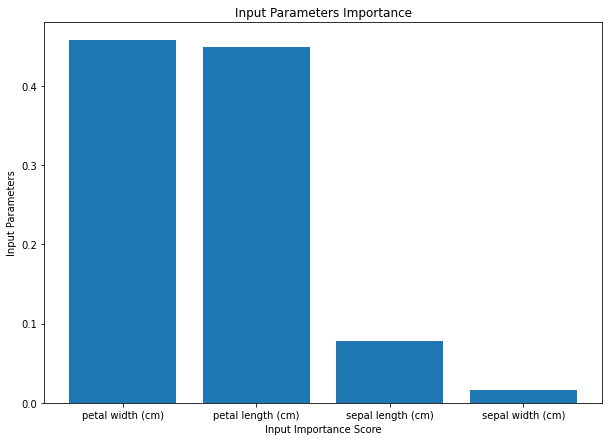

In [21]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 7]

plt.bar(input_parameters.index,input_parameters.values)
plt.title('Input Parameters Importance')
plt.xlabel('Input Importance Score')
plt.ylabel('Input Parameters')


**Conclusion:**

In this Jupyter Notebook we have managed to build a classification model for the Iris Flower Dataset using the Random Forrest Algorithm by focusing on the Petal and Sepal features of the Iris Flower.The input parameters of the petal play a significant role in determining the classification prediction whilst the parameter of sepal width seems to be of little importance. According to the accuracy function and my own calculationsthe model produces an accurate prediction over 90% of the time.

